In [1]:
# import necessary libraries
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import normalize
from scipy.sparse.linalg import eigsh
from scipy.signal import find_peaks
from scipy.spatial import Delaunay
from scipy.spatial import distance
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import multiprocessing as mp
from sklearn import metrics
import networkx as nx
import numpy as np
import random
import csv

In [17]:
%run ./functions_for_GrapHiC.ipynb

In [3]:
def plot_points(P, labels, plot_tile, s) :
    plt.figure(figsize = (7, 7))
    plt.scatter(P[:,0], P[:,1], c = labels, cmap = 'rainbow_r', s = s)
    plt.gca().set_aspect('equal'), plt.title(plot_tile), plt.xlabel('x(mm)'), plt.ylabel('y(mm)')
    plt.show()

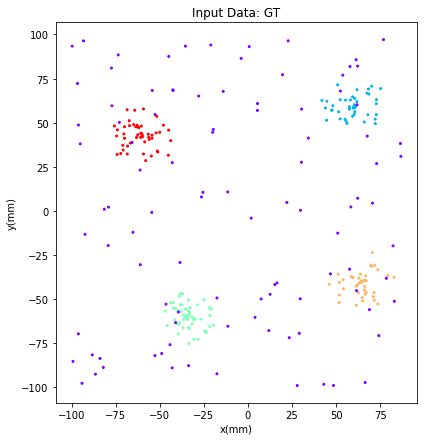

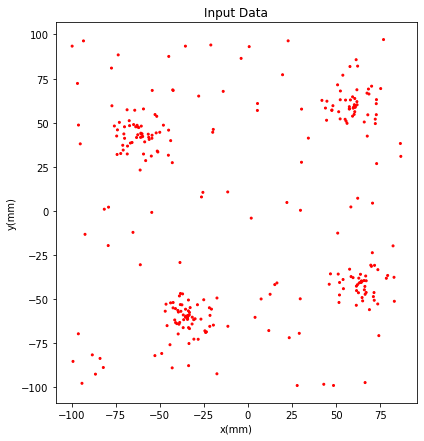

In [4]:
def give_circle_points(rmin, rmax, n_points, center):
    # This function generates "n_points" uniform points inside a circle with center of "center", 
    # and a random radius between "r_min" and "rmax"
    r         = np.random.uniform(rmin, rmax, 1)
    r_s       = np.random.uniform(0, r, n_points)
    theta_s   = np.random.uniform(0, np.pi*2, n_points)
    sin_theta = np.sin(theta_s)
    cos_theta = np.cos(theta_s)
    points    = [[center[0] + r_s[i] * cos_theta[i], center[1] + r_s[i] * sin_theta[i]] for i in range(n_points)]  
    return points


np.random.seed(10)


truelabels = []
k          = 0

centers = [(-60, 42), (65, -40), (-35, -60), (60, 60)]
points  = np.array([[0, 0]])
numbers = [50, 40, 55, 45]  

for i, center in enumerate(centers):
    temp = give_circle_points(16, 20, numbers[i], center)
    truelabels = truelabels + [k for t in list(range(numbers[i]))]
    k          = k + 1
    for t in temp:
        points = np.append(points, [t], axis=0)

points = points[1:]  


noise      = np.random.uniform(low=[-100, -100], high=[100, 100], size=(100,2))
truelabels = truelabels + [k for t in  list(range(100))]
k          = k + 1
for t in noise:
    points = np.append(points, [t], axis=0)

P1              = points 
Sigma1          = np.ones((P1.shape[0], 2, 2)) * 0.5
Sigma1[:, 0, 1] = 0
Sigma1[:, 1, 0] = 0
n1              = np.ones((P1.shape[0], 1)).ravel()
truelabels      = np.array(truelabels)




plot_points(P1, truelabels, 'Input Data: GT', 4)
plot_points(P1, truelabels * 0, 'Input Data', 4)

Use GrapHic on my generated data 

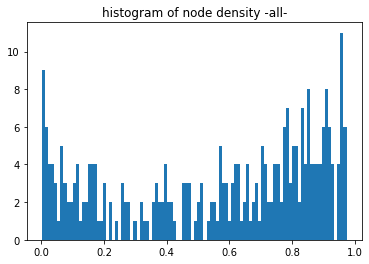

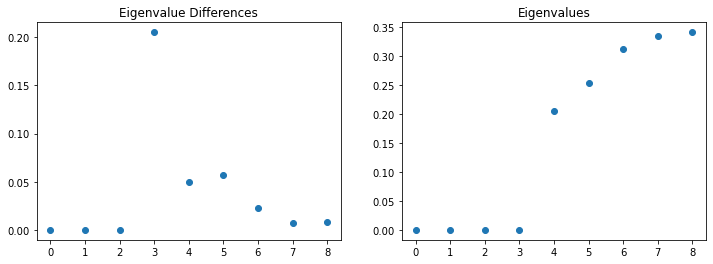

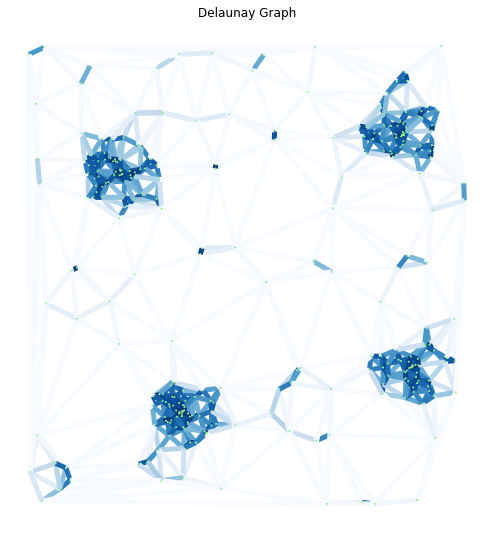

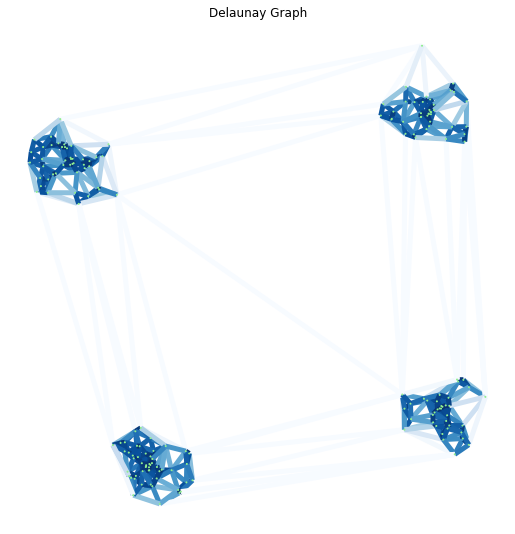

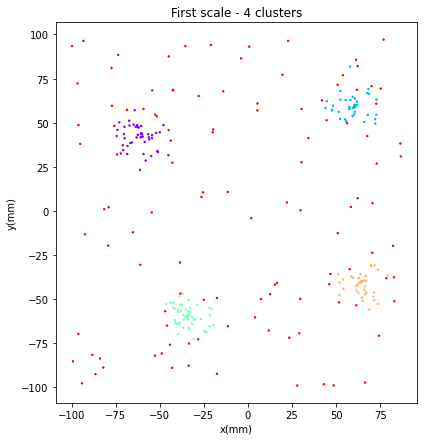

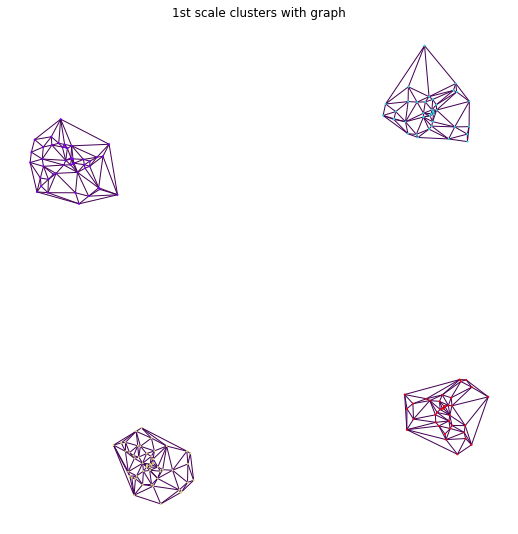

In [26]:
sigma_s = 7
density1, noise_points1, not_noise_points1, G0 = denoise(P1, Sigma1, sigma_s, 0.52, 1)
labels1, G1, k1 = cluster_single_scale(P1, Sigma1, not_noise_points1, sigma_s, 1)
plot_the_graph(G0, P1, 'Delaunay Graph', 1)
plot_the_graph(G1, P1[not_noise_points1], 'Delaunay Graph', 1)
labels1_fid     = labels1
plot_points(P1, labels1, 'First scale - ' + str(k1) + ' clusters', 2)
plot_clusters_with_graph(G1, P1[not_noise_points1], labels1_fid[not_noise_points1], '1st scale clusters with graph', 1)


In [27]:
not_noise_points1

array([  0,   1,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  14,
        15,  16,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  32,  33,  34,  35,  37,  38,  39,  40,  41,  43,  44,
        45,  47,  48,  49,  50,  51,  52,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  67,  68,  69,  70,  71,  72,  73,
        74,  75,  76,  77,  78,  79,  80,  81,  84,  85,  86,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  99, 100, 101, 102, 103,
       104, 105, 106, 108, 109, 110, 111, 112, 115, 116, 117, 118, 119,
       120, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 154, 155, 156, 157, 159, 161, 162, 163,
       164, 167, 168, 169, 170, 172, 173, 174, 175, 176, 177, 179, 180,
       182, 183, 184, 185, 186, 187, 188, 189, 193, 204, 223, 227, 235,
       243, 253, 259, 264, 281])

In [28]:
all_points = np.concatenate((noise_points1,not_noise_points1))

In [29]:
all_points

array([  2,  13,  17,  31,  36,  42,  46,  53,  66,  82,  83,  87,  98,
       107, 113, 114, 121, 128, 153, 158, 160, 165, 166, 171, 178, 181,
       190, 191, 192, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,
       205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,
       218, 219, 220, 221, 222, 224, 225, 226, 228, 229, 230, 231, 232,
       233, 234, 236, 237, 238, 239, 240, 241, 242, 244, 245, 246, 247,
       248, 249, 250, 251, 252, 254, 255, 256, 257, 258, 260, 261, 262,
       263, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276,
       277, 278, 279, 280, 282, 283, 284, 285, 286, 287, 288, 289,   0,
         1,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  14,  15,
        16,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  32,  33,  34,  35,  37,  38,  39,  40,  41,  43,  44,  45,
        47,  48,  49,  50,  51,  52,  54,  55,  56,  57,  58,  59,  60,
        61,  62,  63,  64,  65,  67,  68,  69,  70,  71,  72,  7

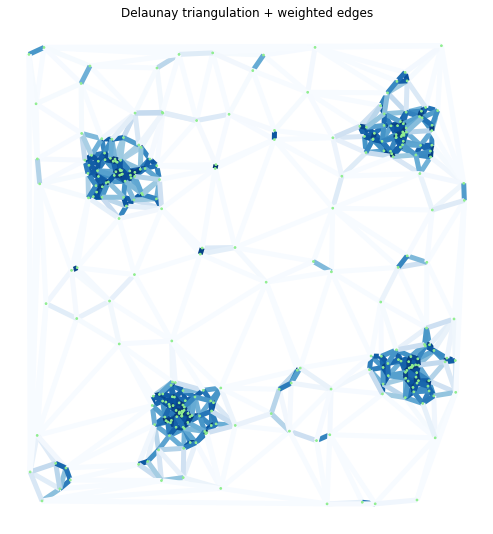

In [30]:
plot_the_graph(G0, P1, 'Delaunay triangulation + weighted edges', 3)

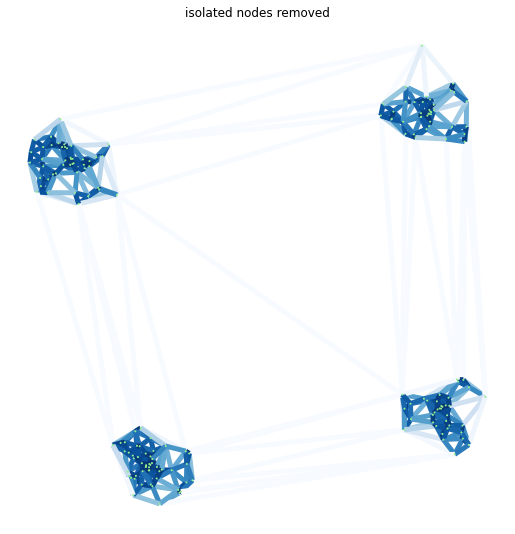

In [53]:
plot_the_graph(G1, P1[not_noise_points1], 'isolated nodes removed', 1)

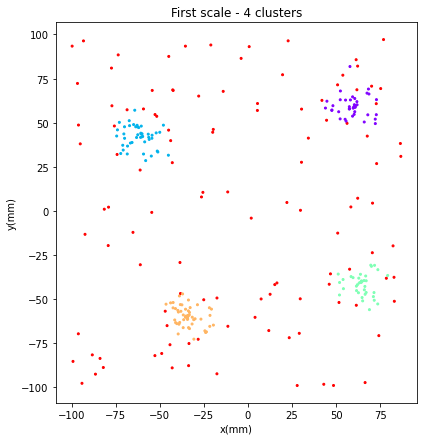

In [57]:
plot_points(P1, labels1, 'First scale - ' + str(k1) + ' clusters', 4)

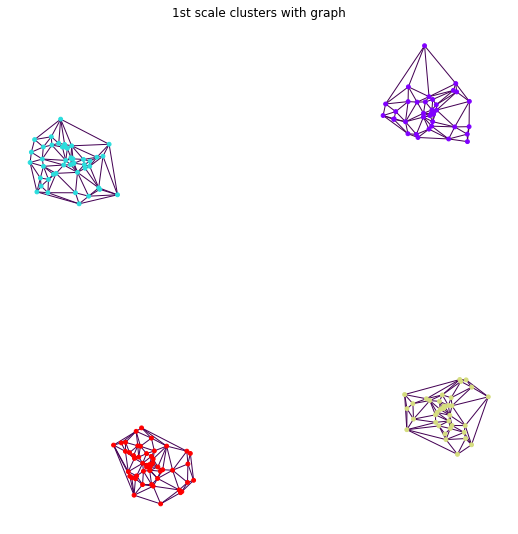

In [59]:
plot_clusters_with_graph(G1, P1[not_noise_points1], labels1_fid[not_noise_points1], '1st scale clusters with graph', 15)

test without denoising

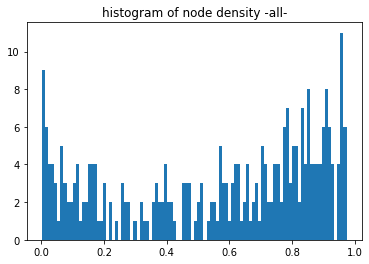

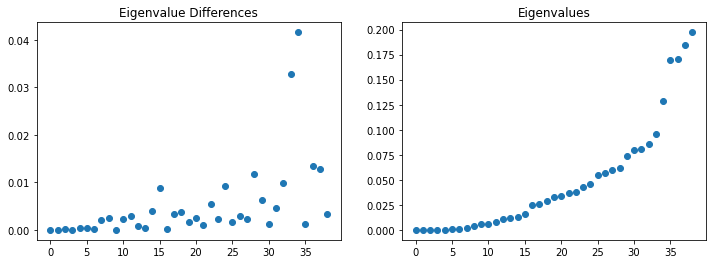

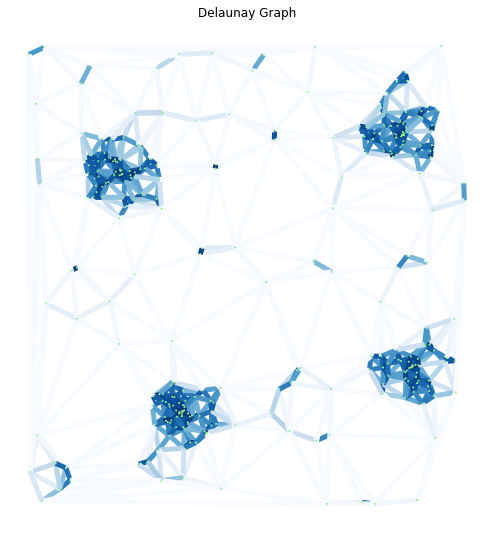

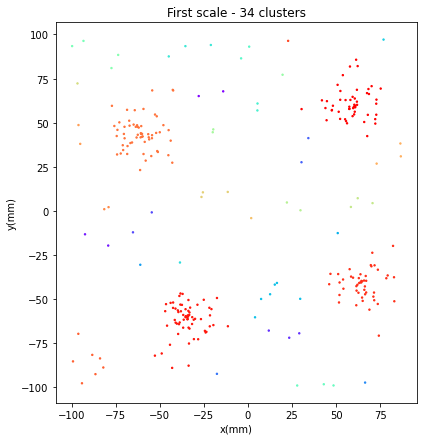

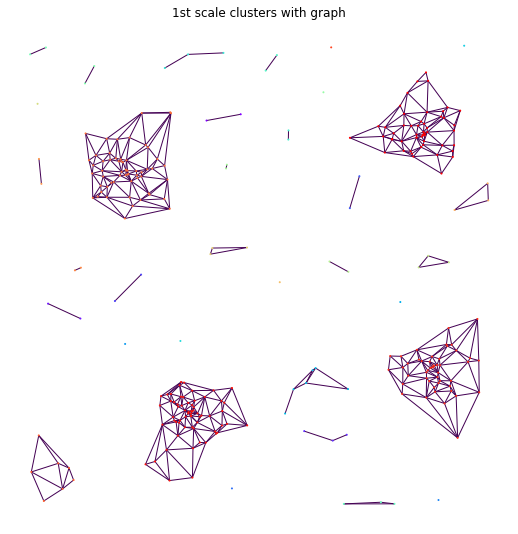

In [35]:
sigma_s = 7
density1, noise_points1, not_noise_points1, G0 = denoise(P1, Sigma1, sigma_s, 0.52, 1)

all_points = np.concatenate((noise_points1,not_noise_points1))

labels1, G1, k1 = cluster_single_scale(P1, Sigma1, all_points, sigma_s, 1)
plot_the_graph(G0, P1, 'Delaunay Graph', 1)
#plot_the_graph(G1, P1[not_noise_points1], 'Delaunay Graph', 1)
labels1_fid     = labels1
plot_points(P1, labels1, 'First scale - ' + str(k1) + ' clusters', 2)
plot_clusters_with_graph(G0, P1, labels1_fid, '1st scale clusters with graph', 1)



Use DB-scan on my generated data

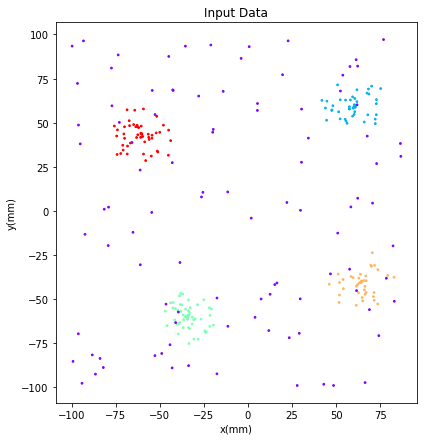

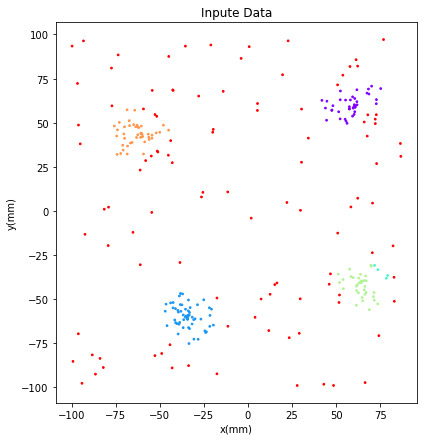

In [85]:
truelabels     = np.array(truelabels)
P              = points 
Sigma          = np.ones((P.shape[0], 2, 2)) * 0.5
Sigma[:, 0, 1] = 0
Sigma[:, 1, 0] = 0
n              = np.ones((P.shape[0], 1)).ravel()


# DBSCAN
db                = DBSCAN(eps=7, min_samples=6).fit(P)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels_db         = db.labels_

plot_points(P, truelabels, 'Input Data', 3)
plot_points(P, labels_db, 'Inpute Data', 3)

In [18]:
# generate data


def give_circle_points(rmin, rmax, n_points, center):
    # This function generates "n_points" uniform points inside a circle with center of "center", 
    # and a random radius between "r_min" and "rmax"
    r         = np.random.uniform(rmin, rmax, 1)
    r_s       = np.random.uniform(0, r, n_points)
    theta_s   = np.random.uniform(0, np.pi*2, n_points)
    sin_theta = np.sin(theta_s)
    cos_theta = np.cos(theta_s)
    points    = [[center[0] + r_s[i] * cos_theta[i], center[1] + r_s[i] * sin_theta[i]] for i in range(n_points)]  
    return points

# ------- 2nd level clusters -------
np.random.seed(29)

centers = [(-25, 25), (120, 40), (50, 125), (90, -25), (125, 90), (46, 50)]
points  = np.array([[0, 0]])
numbers = [18, 12, 21, 8, 8, 9]  
#numbers = [50, 50, 50, 50, 50, 50] 

for i, center in enumerate(centers):
    if i == 5:
        np.random.seed(2)
    temp = give_circle_points(19, 22, numbers[i], center)
    for t in temp:
        points = np.append(points, [t], axis=0)

points = points[1:]  

# ------- 1st level clusters inside 2nd level clusters -------
np.random.seed(29)

centers    = points
points     = np.array([[0, 0]])
truelabels = []
k          = 0

for center in centers:
    temp       = give_circle_points(1.2, 2.4, 15, center)
    truelabels = truelabels + [k for t in list(range(15))]
    k          = k + 1
    for t in temp:
        points = np.append(points, [t], axis=0)

points=points[1:]

# ------- 1st level clusters, dispersed at 2nd scale -------
centers = [(50, -20), (125, 120), (-20, 100), (80, 80), (125, -20),
           (-40, -20), (25, 5), (10, -30), (-10, 145), (75, 25), (150, 75), (10, 75)]

for center in centers:
    temp       = give_circle_points(1.2, 2.4, 15, center)
    truelabels = truelabels + [k for t in list(range(15))]
    k          = k + 1
    for t in temp:
        points = np.append(points, [t], axis=0)
        
# ------- noise -------
noise      = np.random.uniform(low=[-50, -50], high=[150, 150], size=(100,2))
truelabels = truelabels + [k for t in  list(range(100))]
k          = k + 1
for t in noise:
    points = np.append(points, [t], axis=0)
        
P1              = points 
Sigma1          = np.ones((P1.shape[0], 2, 2)) * 0.5
Sigma1[:, 0, 1] = 0
Sigma1[:, 1, 0] = 0
n1              = np.ones((P1.shape[0], 1)).ravel()
truelabels      = np.array(truelabels)

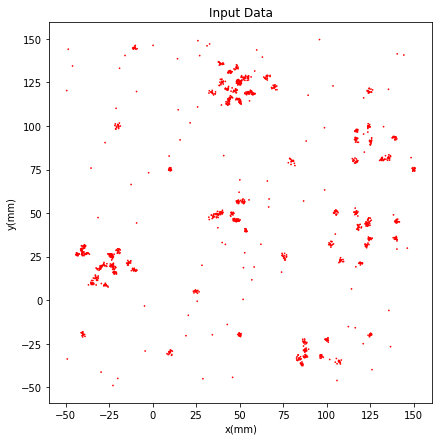

In [19]:
plot_points(P1, truelabels*0, 'Input Data', 0.5)

applying DBscan

Applying GrapHic

--------------------------- First Scale ---------------------------


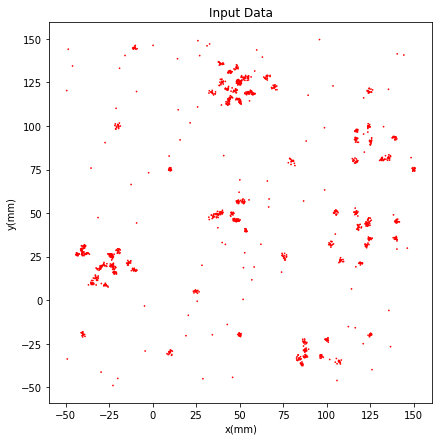

NameError: name 'denoise' is not defined

In [20]:

print('--------------------------- First Scale ---------------------------')
plot_points(P1, truelabels*0, 'Input Data', 0.5)
density1, noise_points1, not_noise_points1 = denoise(P1, Sigma1, 2, 0.2, 1)
labels1, G1, k1 = cluster_single_scale(P1, Sigma1, not_noise_points1, 2, 1)
plot_the_graph(G1, P1[not_noise_points1], 'Delaunay Graph', 1)
labels1_fid     = labels1
plot_points(P1, labels1, 'First scale - ' + str(k1) + ' clusters', 0.5)
plot_clusters_with_graph(G1, P1[not_noise_points1], labels1_fid[not_noise_points1], '1st scale clusters with graph', 1)

print('--------------------------- Second Scale ---------------------------')
P2, Sigma2, n2, cluster_id2  = cluster_to_point(P1[not_noise_points1], Sigma1[not_noise_points1], 
                                   n1[not_noise_points1], k1, labels1[not_noise_points1])
plot_points(P2, n2*0, '2nd scale - input Data', 20)
density2, noise_points2, not_noise_points2 = denoise(P2, Sigma2, 13, 0.15, 1)
labels2, G2, k2 = cluster_single_scale(P2, Sigma2, not_noise_points2, 13, 1)
plot_the_graph(G2, P2[not_noise_points2], 'Delaunay Graph', 10)
labels2_fid, k21 = map_label_to_input(labels1_fid, labels2, k2, cluster_id2)
plot_points(P2, labels2, 'Second scale - ' + str(k2) + ' clusters', 20)
plot_points(P1, labels2_fid, 'Second scale : ' + str(k2) + ' + First sclae : ' + str(12) + '=' + str(k21) + ' clusters', 0.5)
plot_clusters_with_graph(G1, P1[not_noise_points1], labels2_fid[not_noise_points1], '2nd scale clusters with graph', 1)

In [ ]:
def cluster_single_scale_test(P, Sigma, not_noise_point, sigma_s, plot_eigen) :
    # Inputs : 
    # P_i : [x, y], the localization centers
    # Sigma_i : [[sigma_x_i, 0], [0, sigma_y_i]] where sigma_x_i and sigma_y_i are 
    # uncertinties in x and y direction  of the P_i localization respectively.
    # sigma_s : scaling parameter
    # not_noise_point : index of not noise points
    # plot_eigen : 0 or 1, 1 if you want eigenvalues and eigenvalue differences plot

    n_points_wn = P.shape[0]
    P           = P[not_noise_point]
    Sigma       = Sigma[not_noise_point]
    n_points    = P.shape[0]               # number of non-noise points
    sg2         = sigma_s ** 2 
    
    if n_points < 3 :
        print('Not enough points!')
        return
    
    # ------- Constructing weighted graph -------
    dt = Delaunay(points=P)             # Delaunay triangulation for input points
    G  = nx.Graph()                     # G will be the weighted graph for the data
    
    for i in range(n_points):
        G.add_node(i)
    
    for path in dt.simplices:
        a  = path[0]
        b  = path[1]
        c  = path[2]
        d1 = np.exp(-(distance.euclidean(P[a], P[b])**2 + np.trace(Sigma[a] + Sigma[b]))/(2*sg2))
        d2 = np.exp(-(distance.euclidean(P[a], P[c])**2 + np.trace(Sigma[a] + Sigma[c]))/(2*sg2))
        d3 = np.exp(-(distance.euclidean(P[b], P[c])**2 + np.trace(Sigma[b] + Sigma[c]))/(2*sg2))
        G.add_weighted_edges_from([(a, b, d1)])
        G.add_weighted_edges_from([(a, c, d2)])
        G.add_weighted_edges_from([(b, c, d3)])
        
    # ------- Spectral Clustering -------
    
    # ------- 1. Calculating eigenvalues and eigenvectors -------
    vals, vecs = eigsh(nx.laplacian_matrix(G), k=n_points-1, which='SM')
                    
    # ------- 2. Determining number of clusters -------
    
    diff_vals  = np.diff(vals[0:int(n_points/2)])
    prominence = np.max(diff_vals) / 4
    k          = np.min(np.where(diff_vals >= prominence)[0]) + 1
    
    if vals[1] > prominence:   # handle only 1 cluster case
        k = 1
        
    if plot_eigen:
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
        axs[0].scatter(list(range(len(diff_vals[0:k+5]))), diff_vals[0:k+5])
        axs[0].set_title('Eigenvalue Differences')
        axs[1].scatter(list(range(len(vals[0:k+5]))), vals[0:k+5])
        axs[1].set_title('Eigenvalues')
        plt.show()
        
    # ------- 3. Kmeans -------
    kmeans_spec = KMeans(n_clusters=k, random_state=0, n_init = 20).fit(vecs[:,0:k])
    labels_not_noise = kmeans_spec.labels_
    
    labels                  = np.zeros((n_points_wn, 1)).ravel() - 1 # -1 is label for noise
    labels[not_noise_point] = labels_not_noise
    
    return labels, G, k

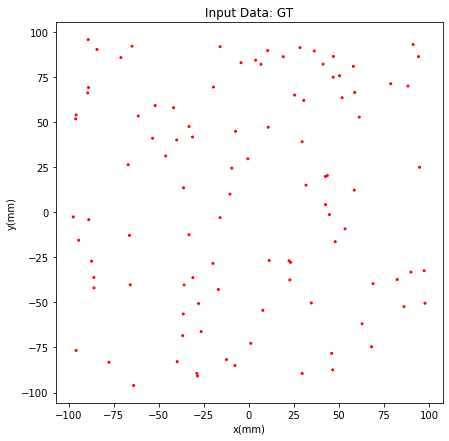

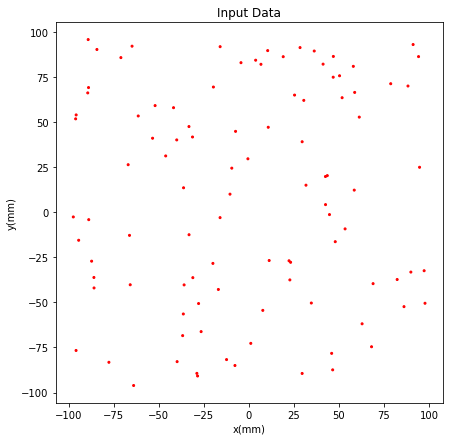

In [8]:
def give_circle_points(rmin, rmax, n_points, center):
    # This function generates "n_points" uniform points inside a circle with center of "center", 
    # and a random radius between "r_min" and "rmax"
    r         = np.random.uniform(rmin, rmax, 1)
    r_s       = np.random.uniform(0, r, n_points)
    theta_s   = np.random.uniform(0, np.pi*2, n_points)
    sin_theta = np.sin(theta_s)
    cos_theta = np.cos(theta_s)
    points    = [[center[0] + r_s[i] * cos_theta[i], center[1] + r_s[i] * sin_theta[i]] for i in range(n_points)]  
    return points


np.random.seed(11)


truelabels = []
k          = 0

centers = [(-60, 42), (65, -40), (-35, -60), (60, 60)]
points  = np.array([[0, 0]])
numbers = [50, 40, 55, 45]  
'''
for i, center in enumerate(centers):
    temp = give_circle_points(16, 20, numbers[i], center)
    truelabels = truelabels + [k for t in list(range(numbers[i]))]
    k          = k + 1
    for t in temp:
        points = np.append(points, [t], axis=0)

''' 


noise      = np.random.uniform(low=[-100, -100], high=[100, 100], size=(100,2))
truelabels = truelabels + [k for t in  list(range(100))]
k          = k + 1
for t in noise:
    points = np.append(points, [t], axis=0)

points          = points[1:] 
P1              = points 
Sigma1          = np.ones((P1.shape[0], 2, 2)) * 0.5
Sigma1[:, 0, 1] = 0
Sigma1[:, 1, 0] = 0
n1              = np.ones((P1.shape[0], 1)).ravel()
truelabels      = np.array(truelabels)




plot_points(P1, truelabels, 'Input Data: GT', 4)
plot_points(P1, truelabels * 0, 'Input Data', 4)

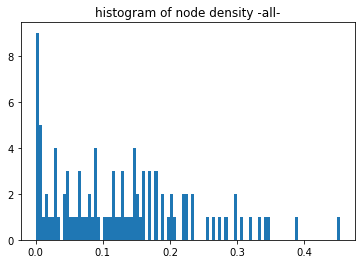

Not enough points!


TypeError: cannot unpack non-iterable NoneType object

In [9]:
sigma_s = 7
density1, noise_points1, not_noise_points1, G0 = denoise(P1, Sigma1, sigma_s, 0.52, 1)
labels1, G1, k1 = cluster_single_scale(P1, Sigma1, not_noise_points1, sigma_s, 1)
plot_the_graph(G0, P1, 'Delaunay Graph', 1)
plot_the_graph(G1, P1[not_noise_points1], 'Delaunay Graph', 1)
labels1_fid     = labels1
plot_points(P1, labels1, 'First scale - ' + str(k1) + ' clusters', 2)
plot_clusters_with_graph(G1, P1[not_noise_points1], labels1_fid[not_noise_points1], '1st scale clusters with graph', 1)



In [12]:
noise_points1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

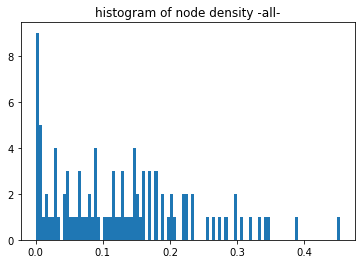

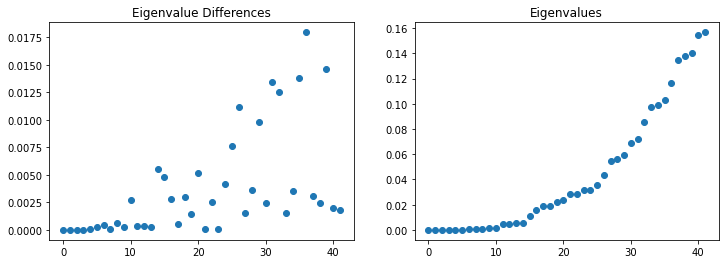

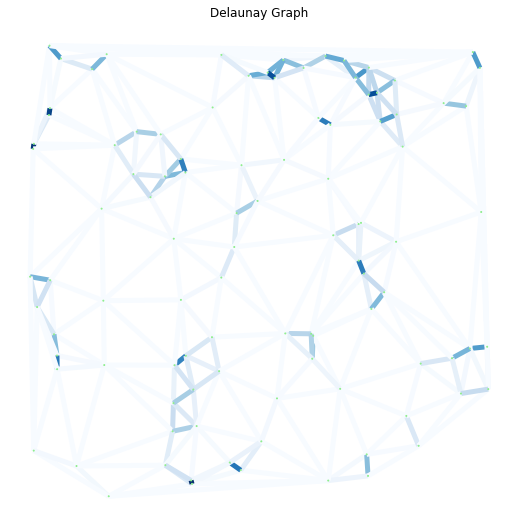

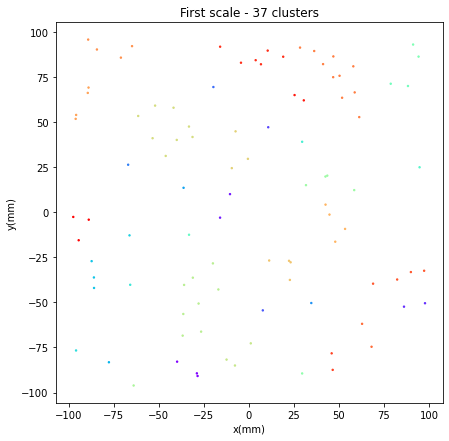

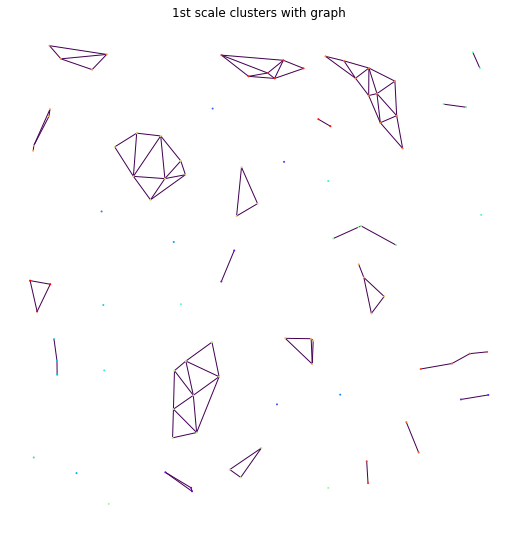

In [13]:
sigma_s = 7
density1, noise_points1, not_noise_points1, G0 = denoise(P1, Sigma1, sigma_s, 0.52, 1)

all_points = np.concatenate((noise_points1,not_noise_points1))

labels1, G1, k1 = cluster_single_scale(P1, Sigma1, all_points, sigma_s, 1)
plot_the_graph(G0, P1, 'Delaunay Graph', 1)
#plot_the_graph(G1, P1[not_noise_points1], 'Delaunay Graph', 1)
labels1_fid     = labels1
plot_points(P1, labels1, 'First scale - ' + str(k1) + ' clusters', 2)
plot_clusters_with_graph(G0, P1, labels1_fid, '1st scale clusters with graph', 1)

